In [48]:

# Created by Tedi Mitiku
# File to perform initial data analysis on attributes dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, random

In [2]:
#Importing attribute dataset
user_data = pd.read_csv("../data/googler_attribute_table.csv")
test_data = pd.read_csv("../data/test_data.csv")

user_data.head()

,user_id,anon_department,anon_cost_center_num,anon_manager_person_id,anon_location_country,anon_lowest_dir_person_id,anon_visible_job_family
0,1,13.0,468,22094,34,2496.0,NaN
1,2,11.0,641,19259,38,2093.0,NaN
2,3,13.0,2048,7110,48,860.0,NaN
3,4,9.0,255,17446,48,2483.0,63.0
4,5,9.0,36,22931,48,NaN,NaN


In [3]:
test_data.head()

,user_one_id,user_two_id,l2,distance
0,5.0,4.0,NaN,1.122298
1,1.0,1.0,NaN,0.000000
2,9.0,9.0,NaN,0.000000
3,2.0,5.0,NaN,0.184698
4,4.0,8.0,NaN,0.890438


In [4]:
user_data.describe()

,user_id,anon_department,anon_cost_center_num,anon_manager_person_id,anon_location_country,anon_lowest_dir_person_id,anon_visible_job_family
count,267703.000000,267534.000000,267703.000000,267703.000000,267703.000000,244495.000000,87095.000000
mean,133854.643844,10.596597,1132.287498,13741.089192,43.798138,1537.066513,48.733176
std,77280.748206,3.098787,601.172577,7918.573316,14.589146,811.421375,18.002398
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,66928.500000,9.000000,597.000000,6926.000000,48.000000,795.000000,45.000000
50%,133855.000000,11.000000,1113.000000,13571.000000,48.000000,1615.000000,56.000000
75%,200781.500000,13.000000,1644.000000,20630.000000,55.000000,2286.000000,56.000000
max,267707.000000,15.000000,2139.000000,27676.000000,73.000000,2841.000000,79.000000


In [5]:
user_data.shape

(267703, 7)

In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267703 entries, 0 to 267702
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   user_id                    267703 non-null  int64  
 1   anon_department            267534 non-null  float64
 2   anon_cost_center_num       267703 non-null  int64  
 3   anon_manager_person_id     267703 non-null  int64  
 4   anon_location_country      267703 non-null  int64  
 5   anon_lowest_dir_person_id  244495 non-null  float64
 6   anon_visible_job_family    87095 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 14.3 MB


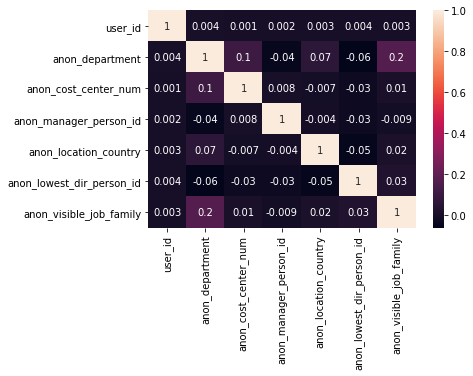

In [7]:
#Identify correlations between attributes
sns.heatmap(user_data.corr(), annot=True, fmt='.1g')

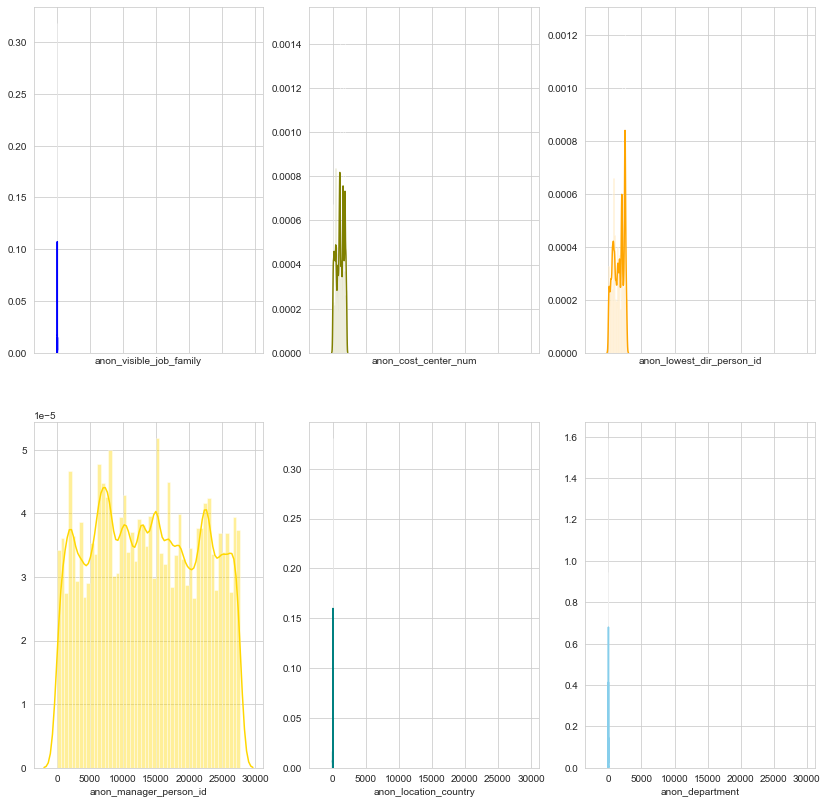

In [47]:
#Visualize distribution of attributes
f, axes = plt.subplots(2, 3, figsize = (14, 14), sharex = True)
sns.distplot(user_data["anon_department"], color="skyblue", ax=axes[0,0])
sns.distplot(user_data["anon_cost_center_num"], color="olive", ax=axes[0,1])
sns.distplot(user_data["anon_manager_person_id"], color="gold", ax=axes[1,0])
sns.distplot(user_data["anon_location_country"], color="teal", ax=axes[1,1])
sns.distplot(user_data["anon_lowest_dir_person_id"], color="orange", ax=axes[0,2])
sns.distplot(user_data["anon_visible_job_family"], color="blue", ax=axes[1,2])

Question: What attributes are most indicative of similar Googlers?
Hypothesis: Googler's with the same manager will have the most similar attribtues.

Approach: Isolate 5 different groups of Googlers with the same manager and analyze similarities in related attributes.

Managers
1. Isolate all Googlers with anon_manager_id=960
2. Visualize the distribution of these Googlers other attributes
3. Repeat for Googlers with anon_manager_id=6314, 3676, 3943, 486

In [30]:
manager_group_one = pd.DataFrame(data=user_data[user_data["anon_manager_person_id"] == 960])
manager_group_one.head()

,user_id,anon_department,anon_cost_center_num,anon_manager_person_id,anon_location_country,anon_lowest_dir_person_id,anon_visible_job_family
76,77,13.0,468,960,55,2496.0,NaN
171,172,13.0,1086,960,55,2496.0,NaN
212,213,13.0,1086,960,55,2496.0,NaN
236,237,13.0,468,960,55,2496.0,NaN
405,406,13.0,1086,960,55,2496.0,NaN


[Text(0, 0, 'anon_department'),
 Text(0, 0, 'anon_cost_center_num'),
 Text(0, 0, 'anon_manager_person_id'),
 Text(0, 0, 'anon_location_country'),
 Text(0, 0, 'anon_lowest_dir_person_id'),
 Text(0, 0, 'anon_visible_job_family')]

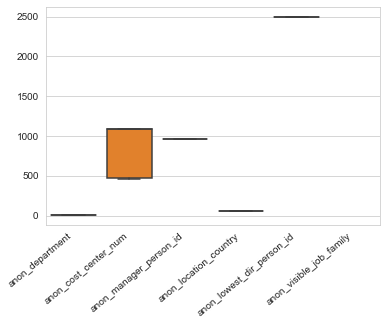

In [34]:
stats_df = manager_group_one.drop(['user_id'], axis = 1)
sns.set_style("whitegrid")
bp = sns.boxplot(data = stats_df)
bp.set_xticklabels(bp.get_xticklabels(), rotation="40", ha="right")

In [36]:
manager_group_two = pd.DataFrame(data=user_data[user_data["anon_manager_person_id"] == 6314])
manager_group_two.head()

,user_id,anon_department,anon_cost_center_num,anon_manager_person_id,anon_location_country,anon_lowest_dir_person_id,anon_visible_job_family
244,245,13.0,1716,6314,48,NaN,56.0
49913,49914,13.0,1716,6314,48,NaN,56.0
56291,56294,13.0,1544,6314,48,NaN,20.0
62860,62863,13.0,1716,6314,48,NaN,74.0
66854,66857,10.0,224,6314,48,NaN,NaN


[Text(0, 0, 'anon_department'),
 Text(0, 0, 'anon_cost_center_num'),
 Text(0, 0, 'anon_manager_person_id'),
 Text(0, 0, 'anon_location_country'),
 Text(0, 0, 'anon_lowest_dir_person_id'),
 Text(0, 0, 'anon_visible_job_family')]

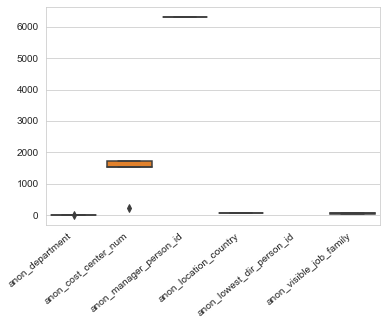

In [37]:
stats_df = manager_group_two.drop(['user_id'], axis = 1)
sns.set_style("whitegrid")
bp = sns.boxplot(data = stats_df)
bp.set_xticklabels(bp.get_xticklabels(), rotation="40", ha="right")

In [40]:
manager_group_three = pd.DataFrame(data=user_data[user_data["anon_manager_person_id"] == 3676])
manager_group_three.head()

,user_id,anon_department,anon_cost_center_num,anon_manager_person_id,anon_location_country,anon_lowest_dir_person_id,anon_visible_job_family
243,244,13.0,1856,3676,48,1235.0,56.0
1873,1874,13.0,1856,3676,48,1235.0,56.0
12652,12653,13.0,1856,3676,48,1235.0,56.0
28084,28085,13.0,1856,3676,48,1235.0,56.0
33628,33629,13.0,1856,3676,48,1235.0,56.0


[Text(0, 0, 'anon_department'),
 Text(0, 0, 'anon_cost_center_num'),
 Text(0, 0, 'anon_manager_person_id'),
 Text(0, 0, 'anon_location_country'),
 Text(0, 0, 'anon_lowest_dir_person_id'),
 Text(0, 0, 'anon_visible_job_family')]

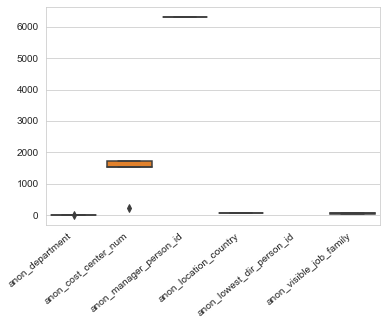

In [41]:
stats_df = manager_group_three.drop(['user_id'], axis = 1)
sns.set_style("whitegrid")
bp = sns.boxplot(data = stats_df)
bp.set_xticklabels(bp.get_xticklabels(), rotation="40", ha="right")

In [43]:
manager_group_four = pd.DataFrame(data=user_data[user_data["anon_manager_person_id"] == 3943])
manager_group_four.head()

,user_id,anon_department,anon_cost_center_num,anon_manager_person_id,anon_location_country,anon_lowest_dir_person_id,anon_visible_job_family
238,239,13.0,1973,3943,46,1323.0,56.0
15278,15279,13.0,1973,3943,46,1323.0,56.0
21081,21082,13.0,1973,3943,46,1323.0,56.0
29213,29214,13.0,1973,3943,46,1323.0,56.0
72512,72515,13.0,1973,3943,46,1323.0,56.0


[Text(0, 0, 'anon_department'),
 Text(0, 0, 'anon_cost_center_num'),
 Text(0, 0, 'anon_manager_person_id'),
 Text(0, 0, 'anon_location_country'),
 Text(0, 0, 'anon_lowest_dir_person_id'),
 Text(0, 0, 'anon_visible_job_family')]

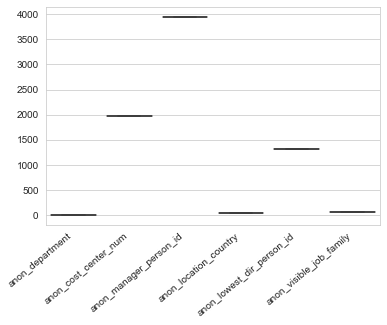

In [44]:
stats_df = manager_group_four.drop(['user_id'], axis = 1)
sns.set_style("whitegrid")
bp = sns.boxplot(data = stats_df)
bp.set_xticklabels(bp.get_xticklabels(), rotation="40", ha="right")

In [45]:
manager_group_five = pd.DataFrame(data=user_data[user_data["anon_manager_person_id"] == 486])
manager_group_five.head()

,user_id,anon_department,anon_cost_center_num,anon_manager_person_id,anon_location_country,anon_lowest_dir_person_id,anon_visible_job_family
245,246,1.0,745,486,48,2616.0,74.0
1025,1026,1.0,745,486,48,2616.0,51.0
3057,3058,1.0,745,486,48,2616.0,74.0
8745,8746,1.0,745,486,48,2616.0,74.0
9423,9424,1.0,745,486,48,2616.0,51.0


[Text(0, 0, 'anon_department'),
 Text(0, 0, 'anon_cost_center_num'),
 Text(0, 0, 'anon_manager_person_id'),
 Text(0, 0, 'anon_location_country'),
 Text(0, 0, 'anon_lowest_dir_person_id'),
 Text(0, 0, 'anon_visible_job_family')]

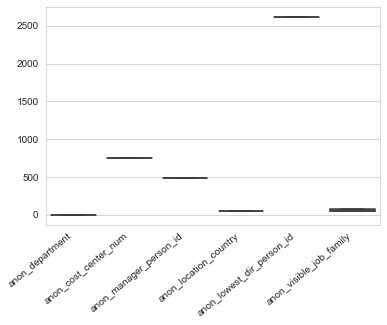

In [46]:
stats_df = manager_group_five.drop(['user_id'], axis = 1)
sns.set_style("whitegrid")
bp = sns.boxplot(data = stats_df)
bp.set_xticklabels(bp.get_xticklabels(), rotation="40", ha="right")

In [57]:
# Sample a random manager id
# Find all Googlers with that manager, compare their attributes
manager_id = random.randint(user_data["anon_manager_person_id"].min(), user_data["anon_manager_person_id"].max())
random_manager_group = pd.DataFrame(data=user_data[user_data["anon_manager_person_id"] == manager_id])
random_manager_group.head()

,user_id,anon_department,anon_cost_center_num,anon_manager_person_id,anon_location_country,anon_lowest_dir_person_id,anon_visible_job_family
23167,23168,1.0,150,19636,48,302.0,4.0
26298,26299,1.0,1227,19636,48,302.0,NaN
45503,45504,1.0,150,19636,48,302.0,4.0
68917,68920,1.0,150,19636,48,302.0,24.0
83903,83906,1.0,150,19636,48,302.0,4.0


[Text(0, 0, 'anon_department'),
 Text(0, 0, 'anon_cost_center_num'),
 Text(0, 0, 'anon_manager_person_id'),
 Text(0, 0, 'anon_location_country'),
 Text(0, 0, 'anon_lowest_dir_person_id'),
 Text(0, 0, 'anon_visible_job_family')]

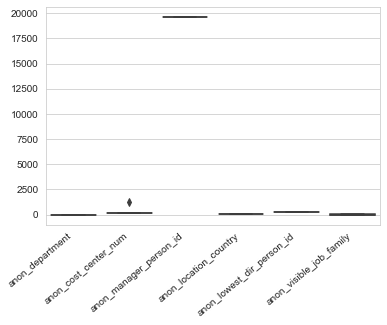

In [61]:
stats_df = random_manager_group.drop(['user_id'], axis = 1)
sns.set_style("whitegrid")
bp = sns.boxplot(data = stats_df)
bp.set_xticklabels(bp.get_xticklabels(), rotation="40", ha="right")